<a href="https://colab.research.google.com/github/ShaiShmuel/oecd_research/blob/master/oecd_bigData_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Big Data Science - Final Project

## Research question: Which environmental parameters better predict mortality?

#  Links
* [import libraries](#import)
* [Load the dataset and data processing](#Load)
* [know and feel the data](#know)
* [Regressions](#regressions)
* [Train the model](#train)
* [Features selection](#features)


### **import libraries**
<a id='import'></a>

In [0]:
# Made By Shai Shmuel
# read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # visualization
import seaborn as sns # visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as pr


### **Load the dataset and data processing**
<a id='Load'></a>

In [0]:
green_house_gasses = pd.read_csv("greenhouse_gasses.csv")
green_house_gasses.tail()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
7428,ARG,Argentina,SF6,Sulphur hexafluoride,TOTAL,Total emissions excluding LULUCF,2012,2012,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,1.777,NaN,NaN
7429,ARG,Argentina,SF6,Sulphur hexafluoride,TOTAL,Total emissions excluding LULUCF,2013,2013,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,1.798,NaN,NaN
7430,ARG,Argentina,SF6,Sulphur hexafluoride,TOTAL,Total emissions excluding LULUCF,2014,2014,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,1.777,NaN,NaN
7431,IDN,Indonesia,CO2,Carbon dioxide,TOTAL,Total emissions excluding LULUCF,2000,2000,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,314697.000,NaN,NaN
7432,IDN,Indonesia,CO2,Carbon dioxide,TOTAL,Total emissions excluding LULUCF,2014,2014,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,628114.000,NaN,NaN


In [0]:
green_house_gasses.drop(columns=['YEA','COU','POL','VAR','Variable','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'],inplace=True)

In [0]:
green_house_gasses[110:115]

,Country,Pollutant,Year,Value
110,Australia,Nitrous oxide,2016,19172.497
111,Australia,Nitrous oxide,2017,20851.184
112,Australia,Hydrofluorocarbons,1990,1424.684
113,Australia,Hydrofluorocarbons,1991,1424.684
114,Australia,Hydrofluorocarbons,1992,1333.184


In [0]:
green_house_gasses_pvt = green_house_gasses.pivot_table('Value',['Country','Year'],'Pollutant')
#green_house_gasses_pvt.drop(columns=['Unspecified mix of HFCs and PFCs'],inplace=True)
green_house_gasses_pvt[0:20]


Pollutant       Carbon dioxide  Greenhouse gases  Hydrofluorocarbons  \
Country   Year                                                         
Argentina 1990      100932.724        220240.771               0.000   
          1991      109765.393        230413.756               0.000   
          1992      112308.399        234122.379               0.000   
          1993      114520.671        239560.142               0.000   
          1994      120321.610        243598.693               0.000   
          1995      122471.459        244499.373               0.000   
          1996      132871.604        256463.932               0.000   
          1997      137246.816        258303.620               0.000   
          1998      141872.342        262725.063               0.000   
          1999      143136.260        264637.841               0.000   
          2000      147559.007        280308.986               0.000   
          2001      137059.771        276902.595               0.000   
          2002      130585.316        269315.644               0.000   
          2003      138890.166        286381.632               0.000   
          2004      152128.317        298167.359               0.000   
          2005      159546.615        307492.666             165.204   
          2006      169871.805        321462.033              95.472   
          2007      183197.355        335854.126             382.824   
          2008      186094.613        331802.165              85.970   
          2009      179865.907        322554.230              18.608   

Pollutant          Methane  Nitrous oxide  Perfluorocarbons  \
Country   Year                                                
Argentina 1990   79891.495      37852.886          1562.949   
          1991   81249.739      38360.335          1037.573   
          1992   82508.600      38345.344           959.407   
          1993   84032.371      39939.083          1067.318   
          1994   82759.523      40005.169           511.722   
          1995   82218.785      39308.090           500.308   
          1996   81887.924      41202.880           500.793   
          1997   80084.465      40505.106           466.468   
          1998   80515.301      39987.878           348.777   
          1999   80182.229      40931.019           387.483   
          2000   88052.629      44370.456           325.819   
          2001   92037.191      47598.742           205.895   
          2002   92853.824      45644.977           230.438   
          2003   98807.439      48562.326           120.595   
          2004   97668.723      48255.286           113.929   
          2005   99138.201      48528.349           113.202   
          2006  100717.212      50662.483           113.957   
          2007  100799.193      51353.292           120.297   
          2008   98482.339      46971.840           165.798   
          2009   94864.364      47630.819           172.857   

Pollutant       Sulphur hexafluoride  
Country   Year                        
Argentina 1990                 0.717  
          1991                 0.717  
          1992                 0.628  
          1993                 0.699  
          1994                 0.669  
          1995                 0.730  
          1996                 0.731  
          1997                 0.765  
          1998                 0.765  
          1999                 0.850  
          2000                 1.076  
          2001                 0.996  
          2002                 1.090  
          2003                 1.105  
          2004                 1.104  
          2005                 1.097  
          2006                 1.104  
          2007                 1.165  
          2008                 1.606  
          2009                 1.675

In [0]:
# Municipal waste generated - Treatment as percentage % - recycling 
mwaste_trtmnt_rcl = pd.read_csv("MUNW_waste_trtmnt_rcl.csv")
mwaste_trtmnt_rcl.head()

,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,RECYCLING_SHARE,% Recycling,2003,2003,PC,Percentage,0,Units,NaN,NaN,30.338,NaN,NaN
1,AUS,Australia,RECYCLING_SHARE,% Recycling,2007,2007,PC,Percentage,0,Units,NaN,NaN,36.803,NaN,NaN
2,AUS,Australia,RECYCLING_SHARE,% Recycling,2008,2008,PC,Percentage,0,Units,NaN,NaN,38.164,NaN,NaN
3,AUS,Australia,RECYCLING_SHARE,% Recycling,2009,2009,PC,Percentage,0,Units,NaN,NaN,39.478,NaN,NaN
4,AUS,Australia,RECYCLING_SHARE,% Recycling,2010,2010,PC,Percentage,0,Units,NaN,NaN,39.985,NaN,NaN


In [0]:
mwaste_trtmnt_rcl.drop(columns=['YEA','COU','VAR','Variable','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'],inplace=True)

In [0]:
mwaste_trtmnt_rcl.rename(columns={'Value' : 'Recycling value'}, inplace = True)

In [0]:
mwaste_trtmnt_rcl.tail()

,Country,Year,Recycling value
753,Lithuania,2016,25.786
754,Lithuania,2017,24.371
755,Costa Rica,2015,0.941
756,Costa Rica,2016,3.769
757,Costa Rica,2017,7.908


In [0]:
# The indicator reports the amount provided by governments to fossil fuel producers and consumers in current USD,
# through direct transfers and revenue forgone for 76 countries between 2007 and 2015.
# The indicator covers the following four fuels: coal, natural gas, petroleum.
TRADEENV_FossilFuels = pd.read_csv("TRADEENV_FossilFuels.csv")
TRADEENV_FossilFuels[20:200]

,LOCATION,Country,MEASURE,Measure,TIME,Year,Value,Flag Codes,Flags
20,LBY,Libya,PETROLEUM,Petroleum,2009,2009,1720000000,NaN,NaN
21,LBY,Libya,PETROLEUM,Petroleum,2010,2010,3170000000,NaN,NaN
22,LBY,Libya,PETROLEUM,Petroleum,2011,2011,4800000000,NaN,NaN
23,LBY,Libya,PETROLEUM,Petroleum,2012,2012,5000000000,NaN,NaN
24,LBY,Libya,PETROLEUM,Petroleum,2013,2013,6000000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,CHL,Chile,PETROLEUM,Petroleum,2013,2013,18618,NaN,NaN
196,CHL,Chile,PETROLEUM,Petroleum,2014,2014,762891,NaN,NaN
197,CHL,Chile,PETROLEUM,Petroleum,2015,2015,1244123,NaN,NaN
198,MYS,Malaysia,NATGAS,Natural Gas,2007,2007,1420000000,NaN,NaN


In [0]:
TRADEENV_FossilFuels.drop(columns=['LOCATION','MEASURE','TIME','Flag Codes','Flags'],inplace=True)

In [0]:
TRADEENV_FossilFuels[50:60]

,Country,Measure,Year,Value
50,Turkmenistan,Natural Gas,2012,4700000000
51,Turkmenistan,Natural Gas,2013,4600000000
52,Turkmenistan,Natural Gas,2014,3300000000
53,Turkmenistan,Natural Gas,2015,2404000000
54,Algeria,Petroleum,2007,4080000000
55,Algeria,Petroleum,2008,6460000000
56,Algeria,Petroleum,2009,3850000000
57,Algeria,Petroleum,2010,8460000000
58,Algeria,Petroleum,2011,10700000000
59,Algeria,Petroleum,2012,12400000000


In [0]:
TRADEENV_FossilFuels_pvt = TRADEENV_FossilFuels.pivot_table('Value',['Country','Year'],'Measure')
TRADEENV_FossilFuels_pvt

Measure          Coal    Natural Gas    Petroleum 
Country  Year                                     
Algeria  2007        0              0   4080000000
         2008        0              0   6460000000
         2009        0              0   3850000000
         2010        0              0   8460000000
         2011        0     3800000000  10700000000
...                ...            ...          ...
Viet Nam 2011        0      200000000   1600000000
         2012        0      700000000    400000000
         2013        0      500000000            0
         2014        0      300000000            0
         2015  2683702      172400000            0

[684 rows x 3 columns]

In [0]:
#Not connected to public sewerage or independent treatment as percentage
not_connected_sewerage = pd.read_csv("WATER_TREAT_not_connected_sewerage.csv")
not_connected_sewerage

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,NOPUBSEWIND,Not connected to public sewerage or independen...,AUT,Austria,1990,1990,PC,Percentage,0,Units,NaN,NaN,28.000000,NaN,NaN
1,NOPUBSEWIND,Not connected to public sewerage or independen...,AUT,Austria,2000,2000,PC,Percentage,0,Units,NaN,NaN,14.599998,NaN,NaN
2,NOPUBSEWIND,Not connected to public sewerage or independen...,AUT,Austria,2010,2010,PC,Percentage,0,Units,NaN,NaN,6.099998,NaN,NaN
3,NOPUBSEWIND,Not connected to public sewerage or independen...,AUT,Austria,2012,2012,PC,Percentage,0,Units,NaN,NaN,5.500000,NaN,NaN
4,NOPUBSEWIND,Not connected to public sewerage or independen...,AUT,Austria,2014,2014,PC,Percentage,0,Units,NaN,NaN,5.032387,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NOPUBSEWIND,Not connected to public sewerage or independen...,CRI,Costa Rica,2013,2013,PC,Percentage,0,Units,NaN,NaN,73.040000,NaN,NaN
276,NOPUBSEWIND,Not connected to public sewerage or independen...,CRI,Costa Rica,2014,2014,PC,Percentage,0,Units,NaN,NaN,71.500000,NaN,NaN
277,NOPUBSEWIND,Not connected to public sewerage or independen...,CRI,Costa Rica,2015,2015,PC,Percentage,0,Units,NaN,NaN,76.850000,NaN,NaN
278,NOPUBSEWIND,Not connected to public sewerage or independen...,CRI,Costa Rica,2016,2016,PC,Percentage,0,Units,NaN,NaN,76.600000,NaN,NaN


In [0]:
not_connected_sewerage.drop(columns=['VAR','Variable','COU','Unit','YEA','Unit Code','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'],inplace=True)
not_connected_sewerage.rename(columns={'Value' : 'Not connected sewerage % value'},inplace=True)

In [0]:
not_connected_sewerage

,Country,Year,Not connected sewerage % value
0,Austria,1990,28.000000
1,Austria,2000,14.599998
2,Austria,2010,6.099998
3,Austria,2012,5.500000
4,Austria,2014,5.032387
...,...,...,...
275,Costa Rica,2013,73.040000
276,Costa Rica,2014,71.500000
277,Costa Rica,2015,76.850000
278,Costa Rica,2016,76.600000


In [0]:
    #This dataset provides selected information on national emissions of traditional air pollutants: emission data
    #nitrogen oxides (NOx), particulate matter (PM), carbon monoxide (CO) and volatile organic compounds (VOC).
    #kilogram for each head
AIR_EMISSIONS_bySRC = pd.read_csv("AIR_EMISSIONS_bySRC.csv")
AIR_EMISSIONS_bySRC[0:50]

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1990,1990,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,93.496,NaN,NaN
1,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1991,1991,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,91.381,NaN,NaN
2,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1992,1992,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,94.985,NaN,NaN
3,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1993,1993,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,99.025,NaN,NaN
4,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1994,1994,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,99.160,NaN,NaN
5,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1995,1995,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,93.041,NaN,NaN
6,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1996,1996,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,96.882,NaN,NaN
7,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1997,1997,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,98.883,NaN,NaN
8,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1998,1998,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,93.817,NaN,NaN
9,AUS,Australia,SOX,Sulphur Oxides,TOT_CAP,Total emissions per capita,1999,1999,KG_HAB,Kilograms per capita,0,Units,NaN,NaN,97.543,NaN,NaN


In [0]:
AIR_EMISSIONS_bySRC.drop(columns=['COU','POL','Unit','Variable','VAR','COU','YEA','Unit Code','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'],inplace=True)

In [0]:
AIR_EMISSIONS_bySRC

,Country,Pollutant,Year,Value
0,Australia,Sulphur Oxides,1990,93.496
1,Australia,Sulphur Oxides,1991,91.381
2,Australia,Sulphur Oxides,1992,94.985
3,Australia,Sulphur Oxides,1993,99.025
4,Australia,Sulphur Oxides,1994,99.160
...,...,...,...,...
5378,Latvia,Sulphur Oxides,2013,1.915
5379,Latvia,Sulphur Oxides,2014,1.923
5380,Latvia,Sulphur Oxides,2015,1.793
5381,Latvia,Sulphur Oxides,2016,1.748


In [0]:
AIR_EMISSIONS_bySRC_pvt = AIR_EMISSIONS_bySRC.pivot_table('Value',['Country','Year'],'Pollutant')

In [0]:
AIR_EMISSIONS_bySRC_pvt

Pollutant           Carbon Monoxide  Nitrogen Oxides  \
Country       Year                                     
Australia     1990          337.751           95.560   
              1991          334.355           92.858   
              1992          338.842           94.358   
              1993          347.704           95.713   
              1994          351.878           94.778   
...                             ...              ...   
United States 2013          162.627           37.173   
              2014          155.948           35.274   
              2015          151.896           32.944   
              2016          143.629           31.231   
              2017          137.628           29.556   

Pollutant           Non-methane Volatile Organic Compounds  \
Country       Year                                           
Australia     1990                                  80.520   
              1991                                  78.734   
              1992                                  77.999   
              1993                                  78.158   
              1994                                  78.050   
...                                                    ...   
United States 2013                                  41.901   
              2014                                  40.844   
              2015                                  40.062   
              2016                                  39.049   
              2017                                  38.179   

Pollutant           Particulates (PM10)  Particulates (PM2.5)  Sulphur Oxides  
Country       Year                                                             
Australia     1990                  NaN                   NaN          93.496  
              1991                  NaN                   NaN          91.381  
              1992                  NaN                   NaN          94.985  
              1993                  NaN                   NaN          99.025  
              1994                  NaN                   NaN          99.160  
...                                 ...                   ...             ...  
United States 2013               50.958                13.272          13.602  
              2014               48.492                12.739          13.015  
              2015               48.123                12.604          10.150  
              2016               47.781                12.482           8.063  
              2017               47.445                12.360           7.610  

[958 rows x 6 columns]

In [0]:
# Life expectancy Difference female-male (years)
LIFEEXD = pd.read_csv('HEALTH_STAT_Female.csv')
LIFEEXD.drop(columns=['COU','Measure','Variable','VAR','COU','YEA','UNIT','Flag Codes','Flags'],inplace=True)
LIFEEXD.rename(columns={'Value' : 'Difference female-male (years)'},inplace=True)

In [0]:
#Malignant neoplasms of stomach | Measure	Deaths per 100 000 population (standardised rates)
HEALSTAT_MELIGENT_OF_STOMACH = pd.read_csv('HEALTH_STAT_Malignant_neoplasms_stomach.csv')
HEALSTAT_MELIGENT_OF_STOMACH.drop(columns=['COU','Measure','Variable','VAR','COU','YEA','UNIT','Flag Codes','Flags'],inplace=True)
HEALSTAT_MELIGENT_OF_STOMACH.rename(columns={'Value' : 'Deaths per 100K population'},inplace=True)


In [0]:
# Mortality rates(years)
Mortality_rates = pd.read_csv('HEALTH_STAT_Mortality.csv')
Mortality_rates.drop(columns=['COU','Measure','Variable','VAR','COU','YEA','UNIT','Flag Codes','Flags'],inplace=True)
Mortality_rates.rename(columns={'Value' : 'Death Age'},inplace=True)


In [0]:
#HEALTH_STAT_Mortality_female
Mortality_rates_female = pd.read_csv('HEALTH_STAT_Mortality_female.csv')
Mortality_rates_female.drop(columns=['COU','Measure','Variable','VAR','COU','YEA','UNIT','Flag Codes','Flags'],inplace=True)
Mortality_rates_female.rename(columns={'Value' : 'Death Age Women'},inplace=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
result = pd.merge(green_house_gasses_pvt, mwaste_trtmnt_rcl,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,TRADEENV_FossilFuels_pvt,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,AIR_EMISSIONS_bySRC_pvt,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,not_connected_sewerage,left_on=['Country','Year'],right_on=['Country','Year'])

result = pd.merge(result,LIFEEXD,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,HEALSTAT_MELIGENT_OF_STOMACH,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,Mortality_rates,left_on=['Country','Year'],right_on=['Country','Year'])
result = pd.merge(result,Mortality_rates_female,left_on=['Country','Year'],right_on=['Country','Year'])


In [0]:
total_pop = pd.read_csv('WPP2019_TotalPopulationBySex.csv')
total_pop.drop(columns=['LocID','VarID','Variant','MidPeriod','PopMale','PopFemale'],inplace = True)
total_pop.rename(columns={'Location':'Country','Time' : 'Year','PopTotal':'PopTotal K'},inplace=True)
#total_pop.loc[:,'PopTotal M'] *= 1000
total_pop.head()

,Country,Year,PopTotal K
0,Afghanistan,1950,7752.117
1,Afghanistan,1951,7840.151
2,Afghanistan,1952,7935.996
3,Afghanistan,1953,8039.684
4,Afghanistan,1954,8151.316


In [0]:
result = pd.merge(result,total_pop,left_on=['Country','Year'],right_on=['Country','Year'])


### Fit the data and handle missing values 

In [0]:
print('rows')
print(result[result == 0].count(axis=1))
print('cols')
print(result[result == 0].count(axis=0))

rows
0      0
1      0
2      0
3      1
4      1
      ..
106    0
107    0
108    1
109    1
110    1
Length: 111, dtype: int64
cols
Country                                    0
Year                                       0
Carbon dioxide                             0
Greenhouse gases                           0
Hydrofluorocarbons                         0
Methane                                    0
Nitrous oxide                              0
Perfluorocarbons                           0
Sulphur hexafluoride                       0
Recycling value                            3
 Coal                                     29
 Natural Gas                              13
 Petroleum                                 4
Carbon Monoxide                            0
Nitrogen Oxides                            0
Non-methane Volatile Organic Compounds     0
Particulates (PM10)                        0
Particulates (PM2.5)                       0
Sulphur Oxides                             0
Not connec

#### By printing the outliers I figured that there is a problem with the data units, the values were as total values for each country and therefor  I decided to divide each value per the pupulation amount at the same year


Text(0, 0.5, 'Carbon dioxide')

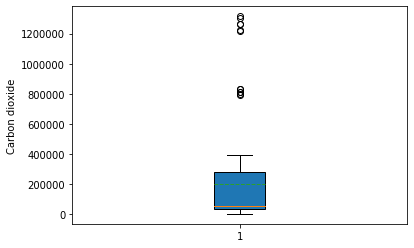

In [0]:

plt.boxplot(result['Carbon dioxide'],meanline=True, showmeans=True,vert=True,patch_artist=True)
plt.ylabel("Carbon dioxide")

In [0]:
final_df = pd.DataFrame(data=result)
final_df = final_df.dropna()
final_df_bigger = final_df
final_df = final_df[(final_df != 0).all(1)]
final_df = final_df.reset_index(drop=True)
final_df[' Coal '] = final_df[' Coal ']/final_df['PopTotal K']
final_df[' Natural Gas '] = final_df[' Natural Gas ']/final_df['PopTotal K']
final_df[' Petroleum '] = final_df[' Petroleum ']/final_df['PopTotal K']
final_df['Carbon dioxide'] = final_df['Carbon dioxide']/final_df['PopTotal K']
final_df['Greenhouse gases'] = final_df['Greenhouse gases']/final_df['PopTotal K']
final_df['Hydrofluorocarbons'] = final_df['Hydrofluorocarbons']/final_df['PopTotal K']
final_df['Methane'] = final_df['Methane']/final_df['PopTotal K']
final_df['Nitrous oxide'] = final_df['Nitrous oxide']/final_df['PopTotal K']
final_df['Perfluorocarbons'] = final_df['Perfluorocarbons']/final_df['PopTotal K']
final_df['Sulphur hexafluoride'] = final_df['Sulphur hexafluoride']/final_df['PopTotal K']


In [0]:
final_df

,Country,Year,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,...,Non-methane Volatile Organic Compounds,Particulates (PM10),Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K
0,Austria,2010,8.588438,10.077742,0.176655,0.862748,0.400193,0.009281,0.039937,27.767,...,16.254,3.713,2.264,1.874,6.099998,5.7,8.8,80.7,83.5,8409.945
1,Austria,2012,7.948166,9.387105,0.175525,0.817255,0.402504,0.005965,0.036682,24.755,...,15.069,3.483,2.045,1.703,5.500000,5.2,9.2,81.0,83.6,8502.230
2,Austria,2014,7.482976,8.900515,0.184164,0.783514,0.406134,0.006155,0.036346,26.342,...,13.917,3.303,1.874,1.686,5.032387,4.9,8.2,81.6,84.0,8615.205
3,Finland,2010,11.945547,14.094300,0.257889,1.000613,0.885926,0.000264,0.004061,19.651,...,23.921,7.014,4.446,12.511,17.000000,6.6,7.7,80.2,83.5,5365.784
4,Finland,2011,10.496902,12.579749,0.256753,0.964389,0.856940,0.000373,0.004392,21.781,...,21.656,6.427,3.904,11.207,17.000000,6.5,7.5,80.6,83.8,5390.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sweden,2013,4.651439,5.756517,0.113053,0.506385,0.475941,0.005326,0.004373,33.053,...,16.533,4.526,2.445,2.299,13.000000,3.6,5.5,82.0,83.8,9618.016
58,Sweden,2014,4.454699,5.554149,0.114914,0.488895,0.482443,0.008463,0.004734,33.058,...,15.937,4.064,2.120,2.039,13.000000,3.8,5.1,82.3,84.2,9692.137
59,Sweden,2015,4.409317,5.474742,0.115961,0.474254,0.466171,0.003598,0.005442,32.075,...,15.629,3.967,2.000,1.795,13.000000,3.7,4.7,82.3,84.1,9764.949
60,Switzerland,2010,5.768361,6.930382,0.167490,0.656564,0.313570,0.004364,0.018950,33.747,...,11.842,2.144,1.058,1.335,2.699997,4.6,5.4,82.6,84.9,7808.674


Text(0, 0.5, 'Carbon dioxide')

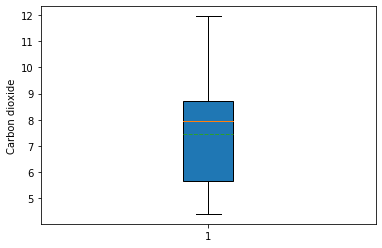

In [0]:
#sns.boxplot(x="Carbon dioxide", y="Death Age",data=final_df).set_title('Death Age by Carbon dioxide')
plt.boxplot(final_df['Carbon dioxide'],meanline=True, showmeans=True,vert=True,patch_artist=True)
plt.ylabel("Carbon dioxide")

In [0]:
q1 = final_df['Carbon dioxide'].quantile(.25)
q3 = final_df['Carbon dioxide'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
outlierstop=final_df[final_df['Carbon dioxide']> toprange]
outliersbot=final_df[final_df['Carbon dioxide']< botrange]
outliers = pd.concat([outliersbot, outlierstop], axis=0)

print(toprange)
print(botrange)

outliers

13.329793864940537
1.0627127357327417


,Country,Year,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,...,Non-methane Volatile Organic Compounds,Particulates (PM10),Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K


## Know and feel with data
#### Figuring out if there are correlations between the features and select the features for the model
<a id='know'></a>

In [0]:
# Min Max scaling
result2 = final_df.drop(columns=['Country','Year'])
min_max_scaler = MinMaxScaler()
norm = min_max_scaler.fit_transform(result2)
Final_dfNorm = pd.DataFrame(data=norm,columns=result2.columns)
Final_dfNorm

,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,Coal,Natural Gas,...,Non-methane Volatile Organic Compounds,Particulates (PM10),Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K
0,0.554537,0.534018,0.146908,0.166645,0.101707,0.173185,0.977098,0.421389,0.044156,0.114206,...,0.278627,0.232078,0.195643,0.040194,0.142388,0.42,0.322835,0.697674,0.644737,0.079838
1,0.469578,0.453894,0.144298,0.147131,0.103838,0.110589,0.896526,0.341221,0.050253,0.101074,...,0.227461,0.201026,0.163620,0.032357,0.125958,0.32,0.354331,0.732558,0.657895,0.080995
2,0.407851,0.397442,0.164251,0.132658,0.107183,0.114183,0.888217,0.383461,0.049653,0.096786,...,0.177720,0.176725,0.138617,0.031578,0.113154,0.26,0.275591,0.802326,0.710526,0.082412
3,1.000000,1.000000,0.334538,0.225783,0.549416,0.002957,0.089136,0.205371,0.304651,0.075454,...,0.609672,0.677737,0.514695,0.527705,0.440854,0.60,0.236220,0.639535,0.644737,0.041664
4,0.807776,0.824289,0.331916,0.210244,0.522699,0.005012,0.097326,0.262064,0.403150,0.066272,...,0.511874,0.598488,0.435444,0.467941,0.440854,0.58,0.220472,0.686047,0.684211,0.041968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.032128,0.032690,0.000000,0.013783,0.171526,0.098525,0.096847,0.562082,0.960164,0.035284,...,0.290674,0.341839,0.222108,0.059673,0.331325,0.00,0.062992,0.848837,0.684211,0.094987
58,0.006022,0.009212,0.004300,0.006280,0.177519,0.157750,0.105777,0.562216,0.874746,0.035212,...,0.264940,0.279465,0.174587,0.047757,0.331325,0.04,0.031496,0.883721,0.736842,0.095917
59,0.000000,0.000000,0.006717,0.000000,0.162520,0.065898,0.123298,0.536052,0.677590,0.020625,...,0.251641,0.266370,0.157041,0.036574,0.331325,0.02,0.000000,0.883721,0.723684,0.096830
60,0.180335,0.168876,0.125737,0.078202,0.021866,0.080373,0.457646,0.580554,0.008634,0.014167,...,0.088126,0.020251,0.019301,0.015491,0.049288,0.20,0.055118,0.918605,0.828947,0.072298


In [0]:
final_df.corr()

,Year,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,Coal,...,Non-methane Volatile Organic Compounds,Particulates (PM10),Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K
Year,1.000000,-0.231756,-0.209946,0.073591,-0.043449,-0.030280,-0.117593,-0.015212,0.154988,0.054446,...,-0.148491,-0.148842,-0.108775,-0.154900,-0.028519,-0.109081,-0.078757,0.117173,0.100544,0.065809
Carbon dioxide,-0.231756,1.000000,0.960730,0.144943,0.287153,0.270164,0.124320,0.278859,0.128955,0.026732,...,0.472255,0.102658,0.034259,0.426031,-0.101862,-0.028527,-0.024145,0.063271,0.068098,0.147650
Greenhouse gases,-0.209946,0.960730,1.000000,0.214007,0.530086,0.489873,0.097346,0.162881,0.068620,0.061144,...,0.514669,0.170824,0.049606,0.447314,0.025890,-0.016481,-0.024998,0.065103,0.075649,0.091498
Hydrofluorocarbons,0.073591,0.144943,0.214007,1.000000,0.151816,0.139857,0.164684,-0.398001,-0.602497,0.039449,...,0.051838,0.083794,-0.080889,0.330999,-0.227758,0.082342,-0.206514,0.244836,0.331375,-0.006797
Methane,-0.043449,0.287153,0.530086,0.151816,1.000000,0.744629,-0.048973,-0.236106,-0.083204,0.051895,...,0.351138,0.341207,0.168478,0.282880,0.528814,0.090838,0.186591,-0.087381,-0.069330,-0.164218
Nitrous oxide,-0.030280,0.270164,0.489873,0.139857,0.744629,1.000000,-0.123707,-0.189921,-0.031794,0.272466,...,0.300780,0.115384,-0.093601,0.102245,0.225015,-0.090247,-0.283188,0.131530,0.129679,-0.051982
Perfluorocarbons,-0.117593,0.124320,0.097346,0.164684,-0.048973,-0.123707,1.000000,-0.068761,-0.054362,-0.254050,...,0.680368,0.385090,0.463896,-0.236015,-0.140565,-0.465281,-0.397680,0.372502,0.276381,-0.252142
Sulphur hexafluoride,-0.015212,0.278859,0.162881,-0.398001,-0.236106,-0.189921,-0.068761,1.000000,0.660927,-0.160002,...,-0.212232,-0.590364,-0.424098,-0.439495,-0.518125,-0.308868,-0.150403,0.173310,0.094260,0.439565
Recycling value,0.154988,0.128955,0.068620,-0.602497,-0.083204,-0.031794,-0.054362,0.660927,1.000000,0.159770,...,-0.112563,-0.455580,-0.290462,-0.466993,-0.181687,-0.492662,-0.141683,0.261191,0.132890,0.287682
Coal,0.054446,0.026732,0.061144,0.039449,0.051895,0.272466,-0.254050,-0.160002,0.159770,1.000000,...,0.022238,-0.186928,-0.376341,0.088695,-0.157744,-0.394552,-0.209171,0.145813,0.029556,-0.102992


In [0]:
Final_dfNorm.corr()

,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,Coal,Natural Gas,...,Non-methane Volatile Organic Compounds,Particulates (PM10),Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K
Carbon dioxide,1.000000,0.960730,0.144943,0.287153,0.270164,0.124320,0.278859,0.128955,0.026732,0.212907,...,0.472255,0.102658,0.034259,0.426031,-0.101862,-0.028527,-0.024145,0.063271,0.068098,0.147650
Greenhouse gases,0.960730,1.000000,0.214007,0.530086,0.489873,0.097346,0.162881,0.068620,0.061144,0.209230,...,0.514669,0.170824,0.049606,0.447314,0.025890,-0.016481,-0.024998,0.065103,0.075649,0.091498
Hydrofluorocarbons,0.144943,0.214007,1.000000,0.151816,0.139857,0.164684,-0.398001,-0.602497,0.039449,0.116935,...,0.051838,0.083794,-0.080889,0.330999,-0.227758,0.082342,-0.206514,0.244836,0.331375,-0.006797
Methane,0.287153,0.530086,0.151816,1.000000,0.744629,-0.048973,-0.236106,-0.083204,0.051895,0.077057,...,0.351138,0.341207,0.168478,0.282880,0.528814,0.090838,0.186591,-0.087381,-0.069330,-0.164218
Nitrous oxide,0.270164,0.489873,0.139857,0.744629,1.000000,-0.123707,-0.189921,-0.031794,0.272466,0.012004,...,0.300780,0.115384,-0.093601,0.102245,0.225015,-0.090247,-0.283188,0.131530,0.129679,-0.051982
Perfluorocarbons,0.124320,0.097346,0.164684,-0.048973,-0.123707,1.000000,-0.068761,-0.054362,-0.254050,0.597527,...,0.680368,0.385090,0.463896,-0.236015,-0.140565,-0.465281,-0.397680,0.372502,0.276381,-0.252142
Sulphur hexafluoride,0.278859,0.162881,-0.398001,-0.236106,-0.189921,-0.068761,1.000000,0.660927,-0.160002,-0.027274,...,-0.212232,-0.590364,-0.424098,-0.439495,-0.518125,-0.308868,-0.150403,0.173310,0.094260,0.439565
Recycling value,0.128955,0.068620,-0.602497,-0.083204,-0.031794,-0.054362,0.660927,1.000000,0.159770,-0.068801,...,-0.112563,-0.455580,-0.290462,-0.466993,-0.181687,-0.492662,-0.141683,0.261191,0.132890,0.287682
Coal,0.026732,0.061144,0.039449,0.051895,0.272466,-0.254050,-0.160002,0.159770,1.000000,-0.171266,...,0.022238,-0.186928,-0.376341,0.088695,-0.157744,-0.394552,-0.209171,0.145813,0.029556,-0.102992
Natural Gas,0.212907,0.209230,0.116935,0.077057,0.012004,0.597527,-0.027274,-0.068801,-0.171266,1.000000,...,0.678593,0.359691,0.378784,-0.171561,-0.091544,-0.379338,-0.259691,0.171662,0.065315,-0.289184


Text(0.5, 1.0, 'Not connected sewerage % value Vs Difference female-male (years)')

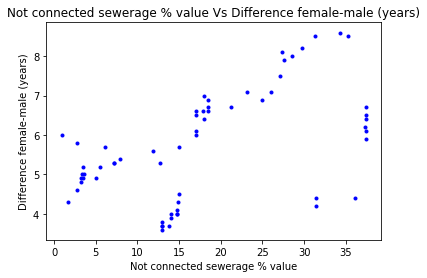

In [0]:
x=final_df['Not connected sewerage % value']
y=final_df['Difference female-male (years)']
plt.scatter(x,y ,c='b',marker='.')
plt.xlabel('Not connected sewerage % value')
plt.ylabel("Difference female-male (years)")
plt.title('Not connected sewerage % value Vs Difference female-male (years)')

Text(0.5, 1.0, 'Natural Gas Vs Difference female-male (years)')

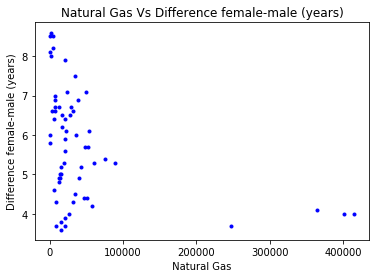

In [0]:
x2=final_df[' Natural Gas ']
y2=final_df['Difference female-male (years)']
plt.scatter(x2,y2 ,c='b',marker='.')
plt.xlabel(' Natural Gas ')
plt.ylabel("Difference female-male (years)")
plt.title('Natural Gas Vs Difference female-male (years)')

Text(0.5, 0.98, 'Linear model ')

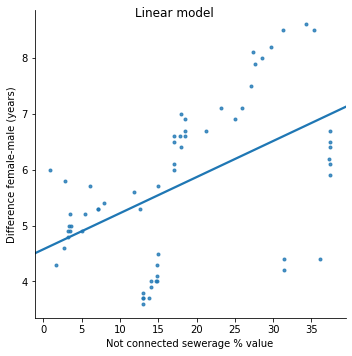

In [0]:
# simple linear regression (SLR) define single input and single output feature
#  x- input(predictor)=Not connected sewerage % value ,  y - output(response/target) = Difference female-male (years)
x=final_df[['Not connected sewerage % value']]  
y=final_df['Difference female-male (years)']  
sns.lmplot(x='Not connected sewerage % value',y='Difference female-male (years)', ci= None, data=final_df, markers='.',order=1)
plt.gcf().suptitle('Linear model ')

In [0]:
lm = LinearRegression()  # define our model using least square method
lm.fit(x,y)              # Fit our linear model
# The coefficients
m = lm.coef_[0]
c = lm.intercept_
print('Coefficients: \n', "slope =", m , ",  Intercept=",c,"\n" )
print("The regression equation is:" ,"Not connected sewerage % = [",m,"] * Difference female-male (years) + [" ,c,"]")

Coefficients: 
 slope = 0.06459322698382708 ,  Intercept= 4.5752275889527265 

The regression equation is: Not connected sewerage % = [ 0.06459322698382708 ] * Difference female-male (years) + [ 4.5752275889527265 ]


In [0]:
Not_connected_sewerage = 18
predicted_difference = m*18+c
print("The predicted difference between female-male with ", Not_connected_sewerage, "%% is %.2fy"%predicted_difference)

The predicted difference between female-male with  18 % is 5.74y


In [0]:
# calculate predicted difference add it to final_df
fitted_differnce = lm.predict(x) # returns ndarray
final_df['fitted_differnce(female-male)']=pd.Series(fitted_differnce)
res=final_df['Difference female-male (years)']-final_df['fitted_differnce(female-male)']
final_df['Res']=pd.Series(res)
final_df

,Country,Year,Carbon dioxide,Greenhouse gases,Hydrofluorocarbons,Methane,Nitrous oxide,Perfluorocarbons,Sulphur hexafluoride,Recycling value,...,Particulates (PM2.5),Sulphur Oxides,Not connected sewerage % value,Difference female-male (years),Deaths per 100K population,Death Age,Death Age Women,PopTotal K,fitted_differnce(female-male),Res
0,Austria,2010,8.588438,10.077742,0.176655,0.862748,0.400193,0.009281,0.039937,27.767,...,2.264,1.874,6.099998,5.7,8.8,80.7,83.5,8409.945,4.969246,0.730754
1,Austria,2012,7.948166,9.387105,0.175525,0.817255,0.402504,0.005965,0.036682,24.755,...,2.045,1.703,5.500000,5.2,9.2,81.0,83.6,8502.230,4.930490,0.269510
2,Austria,2014,7.482976,8.900515,0.184164,0.783514,0.406134,0.006155,0.036346,26.342,...,1.874,1.686,5.032387,4.9,8.2,81.6,84.0,8615.205,4.900286,-0.000286
3,Finland,2010,11.945547,14.094300,0.257889,1.000613,0.885926,0.000264,0.004061,19.651,...,4.446,12.511,17.000000,6.6,7.7,80.2,83.5,5365.784,5.673312,0.926688
4,Finland,2011,10.496902,12.579749,0.256753,0.964389,0.856940,0.000373,0.004392,21.781,...,3.904,11.207,17.000000,6.5,7.5,80.6,83.8,5390.036,5.673312,0.826688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Sweden,2013,4.651439,5.756517,0.113053,0.506385,0.475941,0.005326,0.004373,33.053,...,2.445,2.299,13.000000,3.6,5.5,82.0,83.8,9618.016,5.414940,-1.814940
58,Sweden,2014,4.454699,5.554149,0.114914,0.488895,0.482443,0.008463,0.004734,33.058,...,2.120,2.039,13.000000,3.8,5.1,82.3,84.2,9692.137,5.414940,-1.614940
59,Sweden,2015,4.409317,5.474742,0.115961,0.474254,0.466171,0.003598,0.005442,32.075,...,2.000,1.795,13.000000,3.7,4.7,82.3,84.1,9764.949,5.414940,-1.714940
60,Switzerland,2010,5.768361,6.930382,0.167490,0.656564,0.313570,0.004364,0.018950,33.747,...,1.058,1.335,2.699997,4.6,5.4,82.6,84.9,7808.674,4.749629,-0.149629


In [0]:
res2=final_df['Res']**2
mse = res2.mean()
resMeanSqr= (final_df['Difference female-male (years)']-final_df['Difference female-male (years)'].mean())**2

print ("R-squared:" ,1-mse/resMeanSqr.mean())

R-squared: 0.27360531955444467


In [0]:
# calculate MAE, MSE and RMSE for the model manualy

print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
res3=np.abs(final_df['Res'])
print("MAE:",res3.mean())


MSE: 1.3808396276497874
RMSE: 1.1750913273655743
MAE: 0.9787441402375068


Text(0.5, 0.98, 'Linear model of Death age by % of not connected to sewerage')

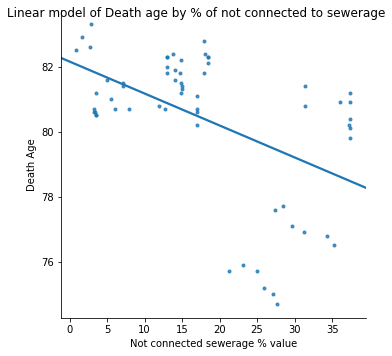

In [0]:
# simple linear regression (SLR) define single input and single output feature
#  x- input(predictor)=Not connected sewerage % value ,  y - output(response/target) = Difference female-male (years)
x3=final_df[['Not connected sewerage % value']]  
y3=final_df['Death Age']  
sns.lmplot(x='Not connected sewerage % value',y='Death Age', ci= None, data=final_df, markers='.',order=1)
plt.gcf().suptitle('Linear model of Death age by % of not connected to sewerage')

In [0]:
lm.fit(x3,y3)              # Fit our linear model
# The coefficients
m = lm.coef_[0]
c = lm.intercept_
print('Coefficients: \n', "slope =", m , ",  Intercept=",c,"\n" )
print("The regression equation is:" ,"Not connected sewerage % = [",m,"] * Death Age + [" ,c,"]")

Coefficients: 
 slope = -0.09835992590972147 ,  Intercept= 82.15627026346063 

The regression equation is: Not connected sewerage % = [ -0.09835992590972147 ] * Death Age + [ 82.15627026346063 ]


In [0]:
# Trying to predict the death age by the percentage of the population that are not connected to a public sewerage
Not_connected_sewerage = 18
predicted_Death_Age = m*18+c
print("The predicted Death Age with ", Not_connected_sewerage, "%% is %.2fy"%predicted_Death_Age)

The predicted Death Age with  18 % is 80.39y


In [0]:
# calculate predicted difference add it to final_df
fitted_differnce = lm.predict(x) # returns ndarray
death_df = final_df
death_df = death_df.drop(death_df.loc[:,'Carbon dioxide':'Deaths per 100K population'].columns, axis = 1) 
death_df = death_df.drop(death_df.loc[:,'Death Age Women':'Res'].columns, axis = 1) 
death_df.head()

,Country,Year,Death Age
0,Austria,2010,80.7
1,Austria,2012,81.0
2,Austria,2014,81.6
3,Finland,2010,80.2
4,Finland,2011,80.6


In [0]:
fitted_differnce = lm.predict(x3) # returns ndarray
death_df['fitted_Death Age']=pd.Series(fitted_differnce)
res=death_df['Death Age']-death_df['fitted_Death Age']
death_df['Res']=pd.Series(res)
death_df.head()

,Country,Year,Death Age,fitted_Death Age,Res
0,Austria,2010,80.7,81.556275,-0.856275
1,Austria,2012,81.0,81.615291,-0.615291
2,Austria,2014,81.6,81.661285,-0.061285
3,Finland,2010,80.2,80.484152,-0.284152
4,Finland,2011,80.6,80.484152,0.115848


In [0]:
res2=death_df['Res']**2
mse = res2.mean()
resMeanSqr= (death_df['Death Age']-death_df['fitted_Death Age'].mean())**2

print ("R-squared:" ,1-mse/resMeanSqr.mean())

R-squared: 0.2473446465178003


In [0]:
# calculate MAE, MSE and RMSE for "Death age by public sewerage connection"

print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
res3=np.abs(final_df['Res'])
print("MAE:",res3.mean())

MSE: 3.669874274364269
RMSE: 1.9156915916619432
MAE: 0.9787441402375068


###  multiple linear regression 
<a id='regressions'></a>

In [0]:
final_df_notNoraml = final_df.drop(columns=['fitted_differnce(female-male)','Res','Country','Year'])


In [0]:
final_df_notNoraml.columns = ['Carbon_dioxide', 'Greenhouse_gases',
       'Hydrofluorocarbons', 'Methane', 'Nitrous_oxide', 'Perfluorocarbons',
       'Sulphur_hexafluoride', 'Recycling_value', 'Coal', 'Natural_Gas',
       'Petroleum', 'Carbon_Monoxide', 'Nitrogen_Oxides',
       'Non_methane_Volatile_Organic_Compounds', 'Particulates_PM10',
       'Particulates_PM2_5', 'Sulphur_Oxides',
       'Not_connected_sewerage_percent_value', 'Difference_female_male_years',
       'Deaths_per_100K_population', 'Death_Age', 'Death_Age_Women','PopTotal_K']

In [0]:
# multiple linear regression using OLS ~ Depended variable : Death Age
import statsmodels.formula.api as smf

linregmodel_final =smf.ols(formula='Death_Age~Carbon_dioxide+Greenhouse_gases+Hydrofluorocarbons+Methane+Nitrous_oxide+Perfluorocarbons+Sulphur_hexafluoride+Recycling_value+Coal+Natural_Gas+Petroleum+Carbon_Monoxide+Nitrogen_Oxides+Non_methane_Volatile_Organic_Compounds+Particulates_PM10+Particulates_PM2_5+Sulphur_Oxides+Not_connected_sewerage_percent_value',data=final_df_notNoraml)
result=linregmodel_final.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Death_Age   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     58.61
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.06e-24
Time:                        18:17:58   Log-Likelihood:                -36.646
No. Observations:                  62   AIC:                             111.3
Df Residuals:                      43   BIC:                             151.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 86.3502      1.198     72.097      0.000      83.935      88.766
Carbon_dioxide                            38.5111     51.117      0.753      0.455     -64.575     141.598
Greenhouse_gases                         -39.5299     51.050     -0.774      0.443    -142.481      63.422
Hydrofluorocarbons                        41.2050     50.105      0.822      0.415     -59.841     142.251
Methane                                   38.6785     50.956      0.759      0.452     -64.084     141.441
Nitrous_oxide                             43.5526     51.456      0.846      0.402     -60.218     147.323
Perfluorocarbons                          50.1489     54.870      0.914      0.366     -60.508     160.805
Sulphur_hexafluoride                      33.4611     48.871      0.685      0.497     -65.097     132.019
Recycling_value                            0.0653      0.019      3.405      0.001       0.027       0.104
Coal                                    9.405e-09   5.21e-06      0.002      0.999   -1.05e-05    1.05e-05
Natural_Gas                            -4.955e-07   2.71e-06     -0.183      0.856   -5.96e-06    4.96e-06
Petroleum                              -2.583e-08   2.75e-06     -0.009      0.993   -5.58e-06    5.53e-06
Carbon_Monoxide                           -0.0331      0.015     -2.206      0.033      -0.063      -0.003
Nitrogen_Oxides                            0.4854      0.053      9.187      0.000       0.379       0.592
Non_methane_Volatile_Organic_Compounds    -0.0516      0.075     -0.685      0.497      -0.204       0.100
Particulates_PM10                         -2.8278      0.330     -8.570      0.000      -3.493      -2.162
Particulates_PM2_5                         1.4487      0.405      3.575      0.001       0.632       2.266
Sulphur_Oxides                             0.0914      0.061      1.488      0.144      -0.032       0.215
Not_connected_sewerage_percent_value       0.0306      0.033      0.929      0.358      -0.036       0.097
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   2.429
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.030
Skew:                          -0.043   Prob(JB):                        0.985
Kurtosis:                       2.935   Cond. No.                     3.99e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Split the data
Train-test split is a practice that is followed in the model building and evaluation workflow. Testing the dataset on a testing data that is totally excluded from the training data helps us evaluating our model performance in a close to real scenario.
</br>
We will split our data so:
* 70% is the training set
* 30% is the testing set


In [0]:

x = final_df_notNoraml[['Carbon_dioxide','Greenhouse_gases','Hydrofluorocarbons', 'Methane', 'Nitrous_oxide', 'Perfluorocarbons',
       'Sulphur_hexafluoride', 'Recycling_value', 'Coal', 'Natural_Gas',
       'Petroleum', 'Carbon_Monoxide', 'Nitrogen_Oxides',
       'Non_methane_Volatile_Organic_Compounds', 'Particulates_PM10',
       'Particulates_PM2_5', 'Sulphur_Oxides','Not_connected_sewerage_percent_value']].values
y = final_df_notNoraml['Death_Age'].values 
# split to train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train the model 
<a id='train'></a>

In [0]:
# predict
y_train_predicted = lr.predict(x_train)
y_test_predicted = lr.predict(x_test)
train_residual = y_train_predicted - y_train
test_residual = y_test_predicted - y_test

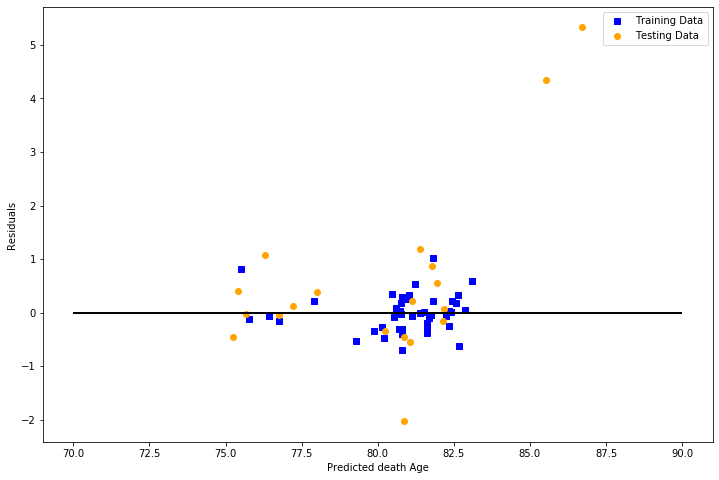

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_predicted, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_predicted, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted death Age")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=70, xmax=90, lw=2, color='k')
plt.show()

In [0]:
from sklearn import metrics
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 0.12445123616361402
RMSE: 0.3527764677010274
MAE: 0.26902932987947414


In [0]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_test_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))
print("MAE:",metrics.mean_absolute_error(y_test, y_test_predicted))

------ TEST DATA ------
MSE: 2.9586689658863117
RMSE: 1.7200781859806
MAE: 0.9800662458041663


### Look like overfitting - big difference between the train and test RMSE values 
### Features selection - we will repeat this process by using a specific feature with high coefficient values and high correlation with the Death age
<a id='features'>

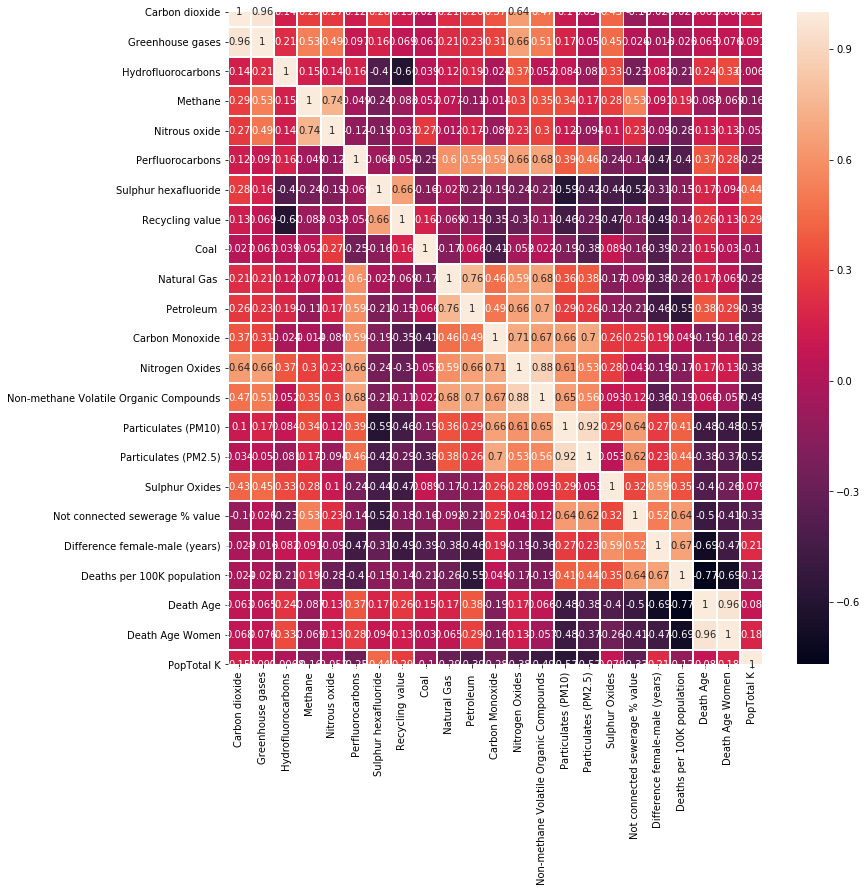

In [0]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(Final_dfNorm.corr(), annot=True, linewidths=.9, ax=ax)


In [0]:
# multiple linear regression using OLS ~ Depended variable : Death Age
# Undepended variables : 'Carbon_Monoxide','Nitrogen_Oxides','Hydrofluorocarbons','Recycling_value','Perfluorocarbons','Particulates_PM10',
# 'Particulates_PM2_5', 'Sulphur_Oxides','Not_connected_sewerage_percent_value'
linregmodel_final =smf.ols(formula='Death_Age~Hydrofluorocarbons+Perfluorocarbons+Recycling_value+Carbon_Monoxide+Nitrogen_Oxides+Particulates_PM10+Particulates_PM2_5+Sulphur_Oxides+Not_connected_sewerage_percent_value',data=final_df_notNoraml)
result=linregmodel_final.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Death_Age   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     30.41
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.10e-17
Time:                        17:09:31   Log-Likelihood:                -80.211
No. Observations:                  62   AIC:                             180.4
Df Residuals:                      52   BIC:                             201.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               85.2121      1.661     51.297      0.000      81.879      88.545
Hydrofluorocarbons                       2.0423      2.545      0.803      0.426      -3.064       7.149
Perfluorocarbons                        77.3423     19.650      3.936      0.000      37.911     116.773
Recycling_value                         -0.0395      0.024     -1.616      0.112      -0.089       0.010
Carbon_Monoxide                         -0.0387      0.017     -2.264      0.028      -0.073      -0.004
Nitrogen_Oxides                          0.2440      0.036      6.769      0.000       0.172       0.316
Particulates_PM10                       -1.7676      0.275     -6.434      0.000      -2.319      -1.216
Particulates_PM2_5                       0.2540      0.295      0.861      0.393      -0.338       0.846
Sulphur_Oxides                          -0.1276      0.040     -3.169      0.003      -0.208      -0.047
Not_connected_sewerage_percent_value     0.0992      0.021      4.728      0.000       0.057       0.141
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.321
Skew:                          -0.139   Prob(JB):                        0.852
Kurtosis:                       2.783   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
print('RMSE', np.sqrt(result.mse_total))


RMSE 2.2261705992023697


### Train the model 


In [0]:
x = final_df_notNoraml[['Carbon_Monoxide','Nitrogen_Oxides','Hydrofluorocarbons','Recycling_value','Perfluorocarbons','Particulates_PM10',
       'Particulates_PM2_5', 'Sulphur_Oxides','Not_connected_sewerage_percent_value']].values
y = final_df_notNoraml['Death_Age'].values 
# split to train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# predict
y_train_predicted = lr.predict(x_train)
y_test_predicted = lr.predict(x_test)
train_residual = y_train_predicted - y_train
test_residual = y_test_predicted - y_test


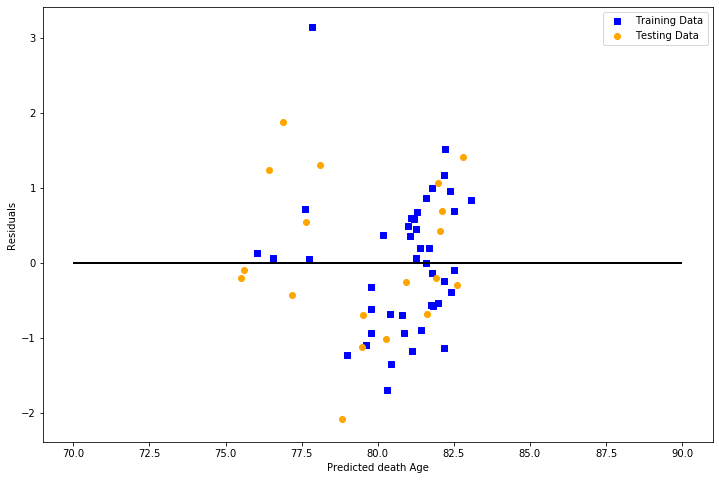

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_predicted, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_predicted, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted death Age")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=70, xmax=90, lw=2, color='k')
plt.show()

#### Compare RMSE values to make sure our model dont have an overfitting problem

In [0]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_predicted))

------ TRAIN DATA ------
MSE: 0.8158936638758466
RMSE: 0.9032683232992545
MAE: 0.7077888653098657


In [0]:
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_test_predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))
print("MAE:",metrics.mean_absolute_error(y_test, y_test_predicted))

------ TEST DATA ------
MSE: 0.9944455954224559
RMSE: 0.9972189305375505
MAE: 0.8231528289683213
